In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


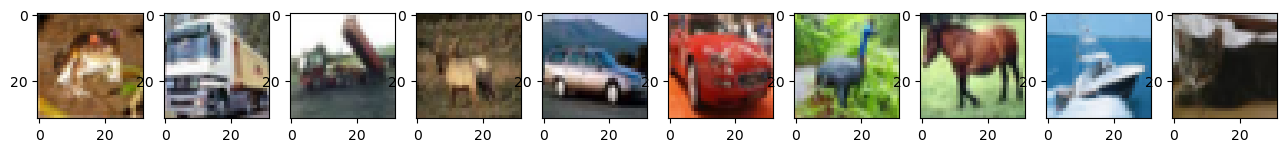

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:10]]))

f, axarr = plt.subplots(1, 10)
f.set_size_inches(16, 6)

for i in range(10):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:

m_train = X_train.shape[0]
m_test = y_train.shape[0]
num_px = X_train.shape[1]



print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 50000
Number of testing examples: m_test = 50000
Height/Width of each image: num_px = 32
Each image is of size: (32, 32, 3)
train_set_x shape: (50000, 32, 32, 3)
train_set_y shape: (50000, 1)
test_set_x shape: (10000, 32, 32, 3)
test_set_y shape: (10000, 1)


In [6]:
x_train = X_train/255.
x_test = X_test/255.
Y_train = convert_to_one_hot(y_train, 11).T
Y_test = convert_to_one_hot(y_test, 11).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 11)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 11)


In [17]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(11, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [18]:
conv_model = convolutional_model((32, 32, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 32, 32, 3)], 0],
        ['Conv2D', (None, 32, 32, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 32, 32, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 11), 390, 'softmax']]


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 8)         392       
                                                                 
 re_lu_6 (ReLU)              (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          528       
                                                                 
 re_lu_7 (ReLU)              (None, 4, 4, 16)          0         
                                                           

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, Y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, Y_test)).batch(32)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
1563/1563 [==============================] - 14s 8ms/step - loss: 2.1068 - accuracy: 0.2186 - val_loss: 1.9204 - val_accuracy: 0.2969
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8276 - accuracy: 0.3337 - val_loss: 1.7489 - val_accuracy: 0.3731
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7164 - accuracy: 0.3794 - val_loss: 1.6808 - val_accuracy: 0.3993
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6607 - accuracy: 0.3985 - val_loss: 1.6398 - val_accuracy: 0.4106
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6225 - accuracy: 0.4146 - val_loss: 1.6082 - val_accuracy: 0.4180
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5914 - accuracy: 0.4260 - val_loss: 1.5777 - val_accuracy: 0.4270
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5623 - accuracy: 0.4365 - val_loss: 1.5512 - v

1563/1563 [==============================] - 9s 6ms/step - loss: 1.3441 - accuracy: 0.5190 - val_loss: 1.3727 - val_accuracy: 0.5085
Epoch 58/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3429 - accuracy: 0.5201 - val_loss: 1.3720 - val_accuracy: 0.5087
Epoch 59/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3418 - accuracy: 0.5201 - val_loss: 1.3711 - val_accuracy: 0.5092
Epoch 60/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3408 - accuracy: 0.5204 - val_loss: 1.3703 - val_accuracy: 0.5103
Epoch 61/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3399 - accuracy: 0.5198 - val_loss: 1.3705 - val_accuracy: 0.5112
Epoch 62/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3389 - accuracy: 0.5210 - val_loss: 1.3685 - val_accuracy: 0.5138
Epoch 63/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3379 - accuracy: 0.5209 - val_loss: 1.3669 - val_accuracy

KeyboardInterrupt: 